#📌 Extracción

Se agrega el url del JSON para cargarlo con la librería pandas y se guarda la información en la variable datos para poder manipularlo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos = pd.read_json(url)

datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformación

## Se normalizan los datos.
Se normalizan los datos para las columnas que estan anidadas y se genera un nuevo DataFrame.

In [2]:
columnas = ['customer', 'phone', 'internet', 'account']
datosNormalizado = datos[['customerID', 'Churn']]

for col in columnas:
  colNormalizada = pd.json_normalize(datos[col])
  datosNormalizado = pd.concat([datosNormalizado, colNormalizada], axis=1)

In [3]:
datosNormalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
datosNormalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


## Se verifica que el DF no contenga ningun valor nulo.

In [5]:
datosNormalizado.isna().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


## Se cambia el nombre de las columnas y su tipo.
Se cambia el nombre de las columnas y su tipo para que sea mas facil de manipular en el analisis.

In [6]:
datosNormalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [7]:
datosNormalizado = datosNormalizado.rename(columns={'Charges.Monthly':'ChargesMonthly'})
datosNormalizado['ChargesMonthly'] = pd.to_numeric(datosNormalizado['ChargesMonthly'], errors='coerce')
datosNormalizado = datosNormalizado.rename(columns={'Charges.Total':'ChargesTotal'})
datosNormalizado['ChargesTotal'] = pd.to_numeric(datosNormalizado['ChargesTotal'], errors='coerce')
datosNormalizado['ChargesTotal'] = datosNormalizado['ChargesTotal'].fillna(0)

datosNormalizado.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [8]:
datosNormalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
datosNormalizado = datosNormalizado.rename(columns={'customerID':'CustomerID'})
datosNormalizado = datosNormalizado.rename(columns={'gender':'Gender'})
datosNormalizado = datosNormalizado.rename(columns={'tenure':'Tenure'})

datosNormalizado.sample(10)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal
1787,2538-OIMXF,No,Female,0,No,Yes,1,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,24.70,24.70
6364,8748-HFWBO,No,Male,0,Yes,Yes,19,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,357.70
5759,7869-ZYDST,No,Male,0,Yes,No,31,Yes,Yes,DSL,...,No,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),59.05,1882.80
1725,2452-SNHFZ,No,Female,0,No,No,47,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,No,Credit card (automatic),75.45,3545.10
2261,3160-TYXLT,No,Male,0,No,No,53,No,No phone service,DSL,...,Yes,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),46.30,2546.85
6944,9565-FLVCG,No,Male,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,No,No,No,Yes,Two year,Yes,Mailed check,69.55,4459.15
6624,9103-TCIHJ,Yes,Female,0,No,No,15,Yes,Yes,DSL,...,No,No,No,No,No,Month-to-month,Yes,Mailed check,55.70,899.80
3581,4933-BSAIP,No,Female,0,Yes,No,40,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.10,780.10
2444,3411-WLRSQ,No,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.60,239.05
5417,7407-SUJIZ,No,Male,0,No,No,25,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.60,541.50


## Se verifican duplicados.
Se verifica que el id del cliente no este duplicado ya que en la base de datos debe ser unico.

In [10]:
datosNormalizado[datosNormalizado.duplicated(subset='CustomerID', keep=False)]

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal


## Se verifican valores unicos.
Se realiza un chequeo de las columnas object para verificar valores unicos y asegurarnos de que no hay datos incorrectos o no necesarios que puedan afectar el analisis.

In [11]:
for col in datosNormalizado.columns:
  if datosNormalizado[col].dtype == 'object' and col != 'CustomerID' :
    print(f"Valores unicos en la columna '{col}':")
    print(datosNormalizado[col].unique())
    print()

Valores unicos en la columna 'Churn':
['No' 'Yes' '']

Valores unicos en la columna 'Gender':
['Female' 'Male']

Valores unicos en la columna 'Partner':
['Yes' 'No']

Valores unicos en la columna 'Dependents':
['Yes' 'No']

Valores unicos en la columna 'PhoneService':
['Yes' 'No']

Valores unicos en la columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores unicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores unicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'TechSupport':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'StreamingMovies':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'Contract':
['One year' 'Month-to-month'

Se observa que Churn(clientes vigentes) cuenta con valores vacios por lo que es necesario borrar esas filas ya que no se sabe si es un cliente vigente y no se ocupan para el analisis.

In [12]:
datosNormalizado = datosNormalizado[datosNormalizado['Churn'] != '']

In [13]:
for col in datosNormalizado.columns:
  if datosNormalizado[col].dtype == 'object' and col != 'CustomerID' :
    print(f"Valores unicos en la columna '{col}':")
    print(datosNormalizado[col].unique())
    print()

Valores unicos en la columna 'Churn':
['No' 'Yes']

Valores unicos en la columna 'Gender':
['Female' 'Male']

Valores unicos en la columna 'Partner':
['Yes' 'No']

Valores unicos en la columna 'Dependents':
['Yes' 'No']

Valores unicos en la columna 'PhoneService':
['Yes' 'No']

Valores unicos en la columna 'MultipleLines':
['No' 'Yes' 'No phone service']

Valores unicos en la columna 'InternetService':
['DSL' 'Fiber optic' 'No']

Valores unicos en la columna 'OnlineSecurity':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'OnlineBackup':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'DeviceProtection':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'TechSupport':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'StreamingTV':
['Yes' 'No' 'No internet service']

Valores unicos en la columna 'StreamingMovies':
['No' 'Yes' 'No internet service']

Valores unicos en la columna 'Contract':
['One year' 'Month-to-month' 'T

## Se crea la columna adicional.

In [14]:
datosNormalizado['DailyCharges'] = datosNormalizado['ChargesMonthly'] / 30

datosNormalizado.sample(8)

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesMonthly,ChargesTotal,DailyCharges
5876,8035-BUYVG,Yes,Male,0,Yes,No,40,No,No phone service,DSL,...,Yes,No,No,No,One year,Yes,Electronic check,42.35,1716.45,1.411667
2697,3737-XBQDD,No,Male,0,No,No,24,Yes,Yes,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),84.85,2048.80,2.828333
3937,5380-AFSSK,Yes,Female,0,No,No,5,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,93.90,486.85,3.130000
5313,7251-XFOIL,No,Female,0,No,No,61,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,Month-to-month,No,Mailed check,89.20,5500.60,2.973333
1848,2632-TACXW,No,Female,0,Yes,No,62,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.65,1416.75,0.788333
2680,3721-WKIIL,No,Female,0,No,No,27,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.60,561.15,0.653333
4202,5774-QPLTF,No,Male,0,Yes,Yes,50,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.35,938.95,0.678333
2182,3057-VJJQE,No,Male,0,No,No,35,Yes,Yes,DSL,...,No,No,No,No,Two year,No,Mailed check,55.25,1924.10,1.841667


## Se guarda el DataFrame en un archivo CSV.

En esta etapa se guarda el DF que ya se limpio de incoherencias e inconsistencias.

In [15]:
datosNormalizado.to_csv('TelecomX_Data_Procesado.csv', index=False)

#📊 Carga y análisis

## Análisis descriptivo.

Se realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [16]:
datosNormalizado.describe()

,SeniorCitizen,Tenure,ChargesMonthly,ChargesTotal,DailyCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158723
std,0.368612,24.559481,30.090047,2266.794470,1.003002
min,0.000000,0.000000,18.250000,0.000000,0.608333
25%,0.000000,9.000000,35.500000,398.550000,1.183333
50%,0.000000,29.000000,70.350000,1394.550000,2.345000
75%,0.000000,55.000000,89.850000,3786.600000,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


## Grafica de clientes vigentes.
Se crea una grafica para ver el porcentaje de clientes vigentes y no vigentes.

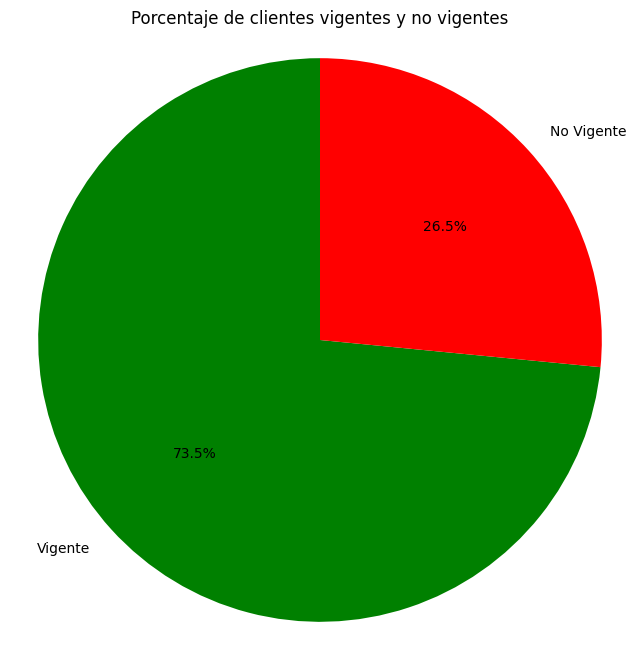

In [17]:
valoresVigentes = datosNormalizado['Churn'].value_counts()
labels = ['Vigente', 'No Vigente']

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(valoresVigentes, labels=labels, autopct='%1.1f%%', colors = ['green', 'red'], startangle=90)
ax.axis('equal')

plt.title('Porcentaje de clientes vigentes y no vigentes')
plt.show()

## Analisis de evasion por variable categorica.

### Vigentes por genero.

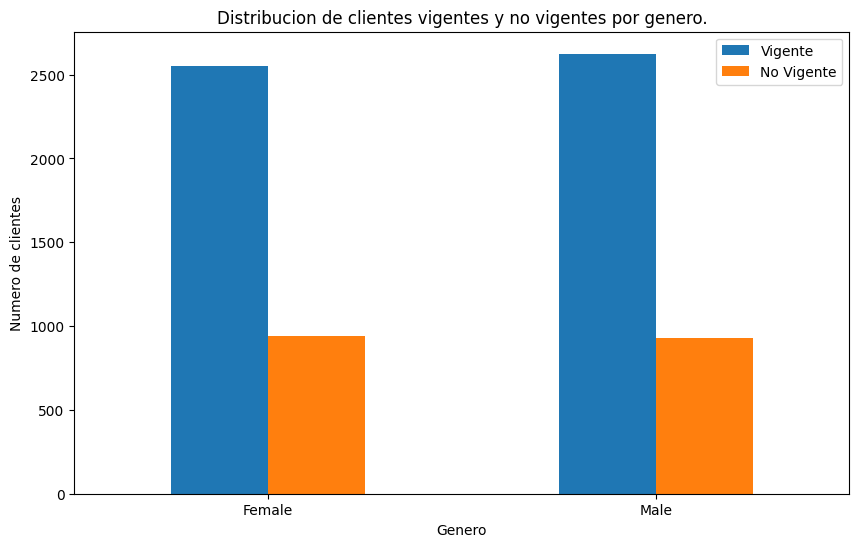

In [18]:
vigentesGenero = datosNormalizado.groupby(['Gender', 'Churn']).size().unstack()

ax = vigentesGenero.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_title('Distribucion de clientes vigentes y no vigentes por genero.')
ax.set_xlabel('Genero')
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.show()

### Vigentes por contrato.

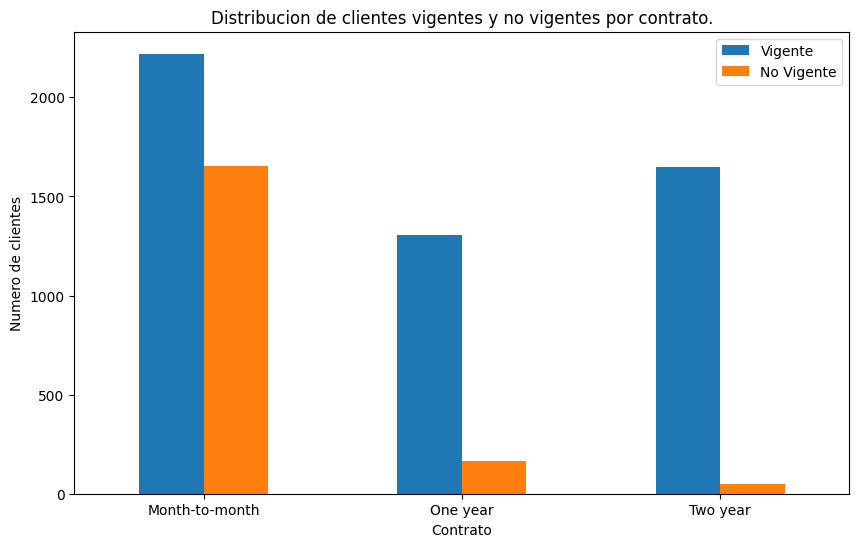

In [19]:
vigentesContrato = datosNormalizado.groupby(['Contract', 'Churn']).size().unstack()

ax = vigentesContrato.plot(kind='bar', figsize=(10, 6), rot=0)
ax.set_title('Distribucion de clientes vigentes y no vigentes por contrato.')
ax.set_xlabel('Contrato')
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.show()

### Vigentes por metodo de pago.

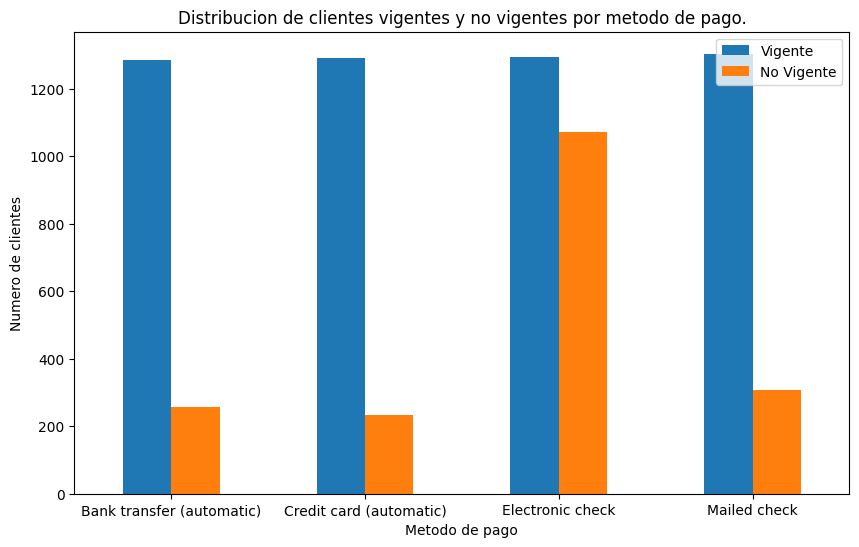

In [20]:
vigentesMetodopago = datosNormalizado.groupby(['PaymentMethod', 'Churn']).size().unstack()

ax = vigentesMetodopago.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_title('Distribucion de clientes vigentes y no vigentes por metodo de pago.')
ax.set_xlabel('Metodo de pago')
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.show()

### Vigentes por edad (igual o mayor a 65 años).

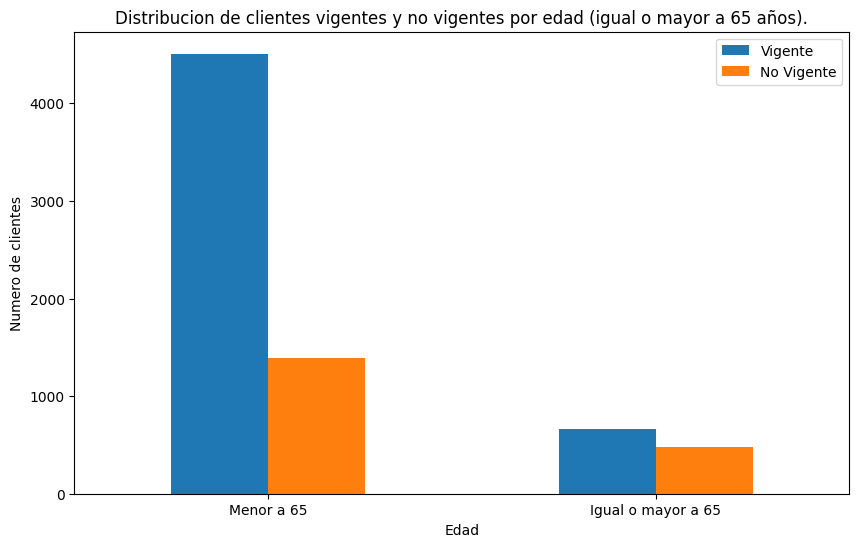

In [21]:
vigentesEdad = datosNormalizado.groupby(['SeniorCitizen', 'Churn']).size().unstack()

ax = vigentesEdad.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_title('Distribucion de clientes vigentes y no vigentes por edad (igual o mayor a 65 años).')
ax.set_xlabel('Edad')
ax.set_xticklabels(['Menor a 65', 'Igual o mayor a 65'])
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.show()

### Vigentes por servicio de internet.

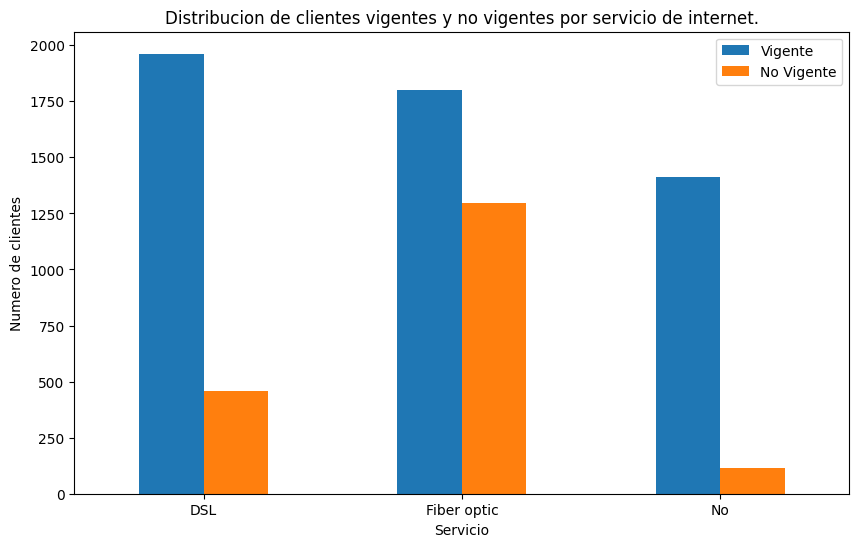

In [34]:
vigentesInternet = datosNormalizado.groupby(['InternetService', 'Churn']).size().unstack()

ax = vigentesMetodopago.plot(kind='bar', figsize=(10, 6), rot=0)

ax.set_title('Distribucion de clientes vigentes y no vigentes por servicio de internet.')
ax.set_xlabel('Servicio')
ax.set_ylabel('Numero de clientes')
ax.legend(labels=['Vigente', 'No Vigente'])

plt.show()

### Clientes vigentes por servicio de internet y telefono.

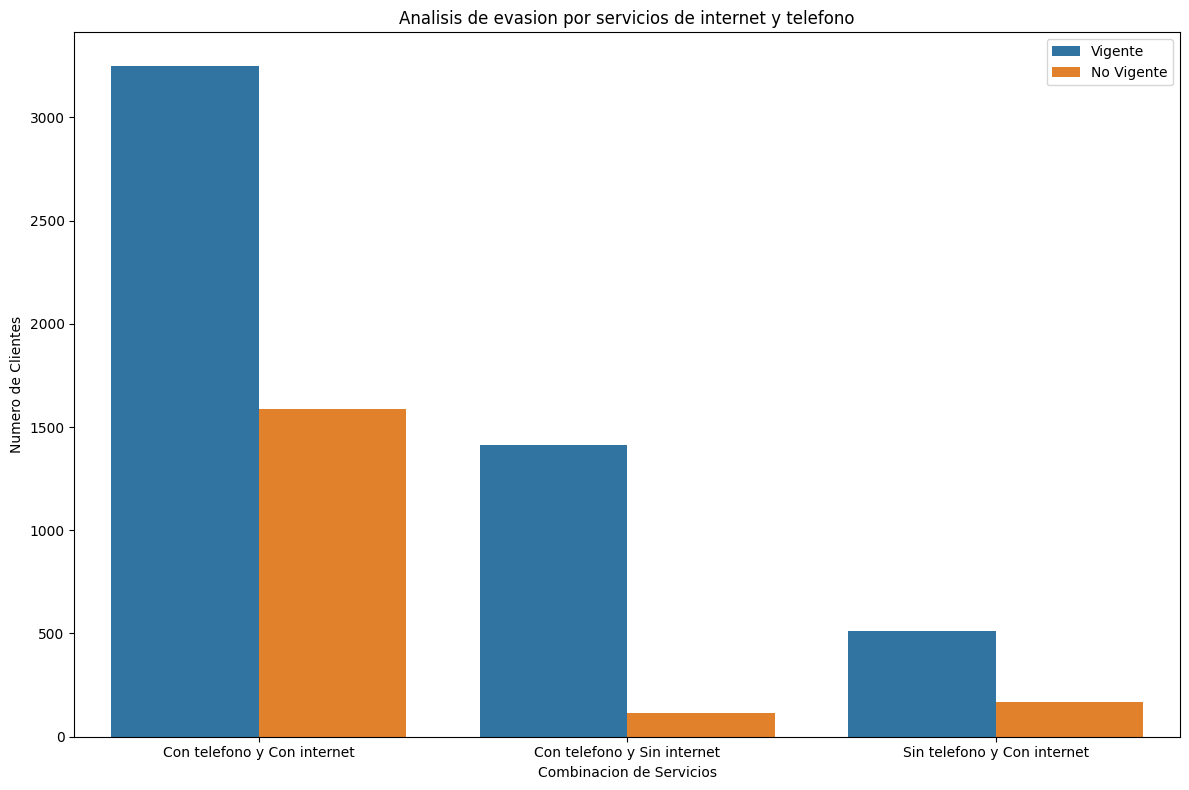

In [32]:
dfTemporal = datosNormalizado.copy()

dfTemporal['ServicioTelefono'] = dfTemporal['PhoneService'].map({'Yes': 'Con telefono', 'No': 'Sin telefono'})
dfTemporal['ServicioInternet'] = dfTemporal['InternetService'].map({
    'Fiber optic': 'Con internet',
    'DSL': 'Con internet',
    'No': 'Sin internet'
})

dfTemporal['Servicios'] = (dfTemporal['ServicioTelefono'] + ' y ' + dfTemporal['ServicioInternet'])

plt.figure(figsize=(12, 8))
sns.countplot(data=dfTemporal, x='Servicios', hue='Churn', order=dfTemporal['Servicios'].value_counts().index)
plt.title('Analisis de evasion por servicios de internet y telefono')
plt.xlabel('Combinacion de Servicios')
plt.ylabel('Numero de Clientes')
plt.legend(labels=['Vigente', 'No Vigente'])

plt.tight_layout()
plt.show()

## Analisis de evasión por variables numéricas

### Evasion por tiempo de contrato.

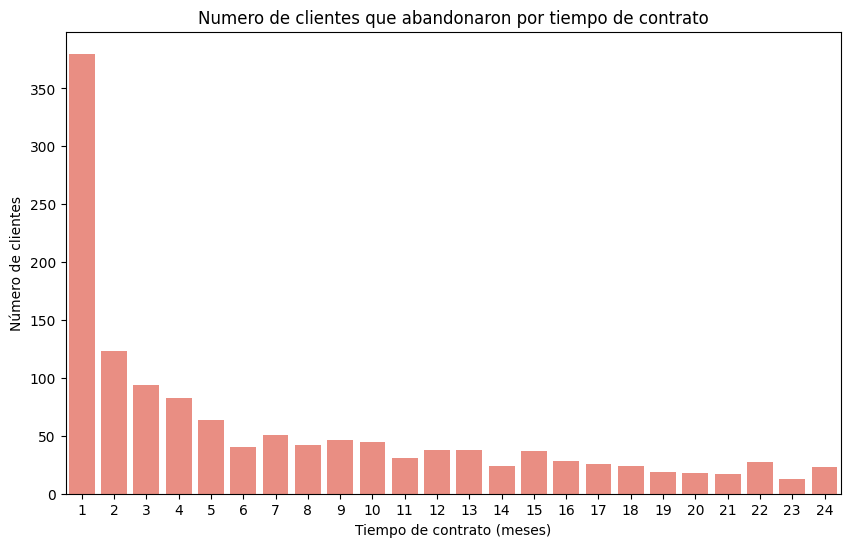

In [25]:
abandonoMeses = datosNormalizado[(datosNormalizado['Churn'] == 'Yes') & (datosNormalizado['Tenure'] <= 24)]

plt.figure(figsize=(10, 6))
sns.countplot(data=abandonoMeses, x='Tenure', color='salmon')
plt.title('Numero de clientes que abandonaron por tiempo de contrato')
plt.xlabel('Tiempo de contrato (meses)')
plt.ylabel('Número de clientes')

plt.show()

#📄Informe final